<a href="https://colab.research.google.com/github/rahulgupta743/Enhance-the-dark/blob/main/latest_CW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import sklearn.cluster as cluster
import seaborn as sns
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}


In [2]:
data =  np.load('cluster_data.npy')

In [3]:
data

array([[-0.12153499, -0.22876337],
       [-0.22093687, -0.25251088],
       [ 0.1259037 , -0.27314321],
       ...,
       [ 0.50243143, -0.3002958 ],
       [ 0.53822256,  0.19412199],
       [-0.08688887, -0.2092721 ]])

SCATTER THE DATA

In [4]:
data.shape

(2309, 2)

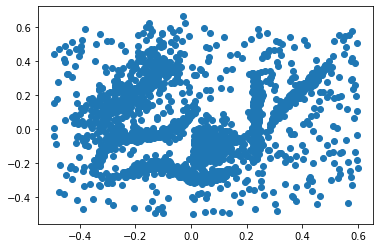

In [5]:
plt.scatter(data[:,0],data[:,1] )

In [6]:
def plot_clusters(data, algorithm):
  start_time = time.time()
  labels = algorithm.fit_predict(data)
  print(labels)
  print(len(np.unique(labels)))
  end_time = time.time()
  palette = sns.color_palette('deep', np.unique(labels).max() + 1)
  colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
  plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
  frame = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)
 # plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
  plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time))
  
  print(validation_score(data , labels))

NORMALIZING THE DATA


In [7]:
from sklearn.preprocessing import StandardScaler

def data_standardizer(data):
  scaler = StandardScaler().fit(data)
  standard_data = StandardScaler().fit_transform(data)
  return standard_data



In [8]:
data

array([[-0.12153499, -0.22876337],
       [-0.22093687, -0.25251088],
       [ 0.1259037 , -0.27314321],
       ...,
       [ 0.50243143, -0.3002958 ],
       [ 0.53822256,  0.19412199],
       [-0.08688887, -0.2092721 ]])

In [12]:
data_std = data_standardizer(data)

validation metrics for clustering


In [9]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
def validation_score(data , labels):
  print("calinski harabasz score is " , calinski_harabasz_score(data , labels))
  print("silhouette_score" , silhouette_score(data , labels))
  print("davies bouldin score ",davies_bouldin_score(data , labels))


  

ELBOW METHOD FOR KMEANS

In [10]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

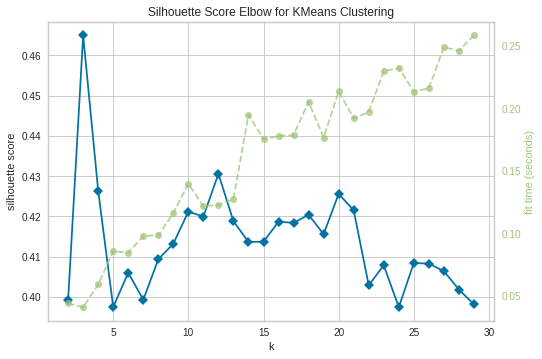

Optimal number of clusters based on silhouette score: [3]


In [ ]:
# from sklearn.cluster import AgglomerativeClustering
# from yellowbrick.cluster import KElbowVisualizer
# model = KMeans()
# # k is range of number of clusters.
# visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True, locate_elbow=False)
# visualizer.fit(data_standardizer(data))        # Fit the data to the visualizer
# visualizer.show()        # Finalize and render the figure

# df = pd.DataFrame(visualizer.k_values_,columns=['centers'])
# df['scores'] = visualizer.k_scores_
# df1 = df[df.scores == df.scores.max()]
# print('Optimal number of clusters based on silhouette score:', df1['centers'].tolist())

In [13]:
from sklearn.cluster import KMeans
inertia_values = [] 
for i in range(1, 10): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_std) 
    inertia_values.append(kmeans.inertia_)


In [14]:
inertia_values

[4617.999999999996,
 2821.158556124011,
 1607.5529138055422,
 1166.1110381825456,
 968.9705006354518,
 817.3845930304276,
 691.4966417678577,
 592.5933171214693,
 519.325004355058]

now we are plotting the cluster values with their inertia

Text(0, 0.5, 'inertia values')

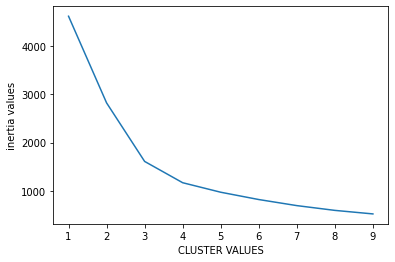

In [15]:
plt.plot(range(1,10) , inertia_values)
plt.xlabel("CLUSTER VALUES")
plt.ylabel("inertia values")

from this elbow chart , we can say that the optimal value for number of cluster is 3

[2 2 2 ... 0 0 2]
3
calinski harabasz score is  2159.2168367790237
silhouette_score 0.46500977321005704
davies bouldin score  0.7422270188304924
None


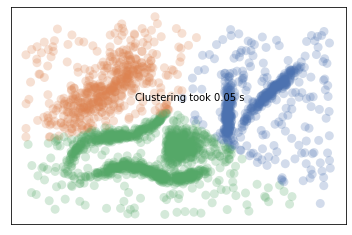

In [16]:

from sklearn.cluster import KMeans
import time
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42 )
plot_clusters(data_standardizer(data) , kmeans)


# ,() , {'n_clusters': 3, 'init':'k-means++', 'n_init':10, 'max_iter':300, 'tol':0.0001, 'verbose':0}) 

In [17]:
def get_pref_range(similarity):
    starting_point = np.median(similarity)

    if starting_point == 0:
        starting_point = np.mean(similarity)

    # Let's try to accelerate the pace of values picking
    if starting_point >= 0.05:
      step =1
    else:
      step = 2

    preference_tuning_range = [starting_point]
    max_val = starting_point
    while max_val < 1:
        max_val *= 1.25 if max_val > 0.1 and step == 2 else step

    preference_tuning_range.append(max_val)

    min_val = starting_point
    if starting_point >= 0.05:
        while min_val > 0.01:
            min_val /= step
            preference_tuning_range.append(min_val)

    return preference_tuning_range

In [18]:
get_pref_range(data_standardizer(data))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()


KeyboardInterrupt: ignored

[-1 -1 -1 ... -1 -1 -1]
2309


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_affinity_propagation.py:253: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  ConvergenceWarning,


ValueError: ignored

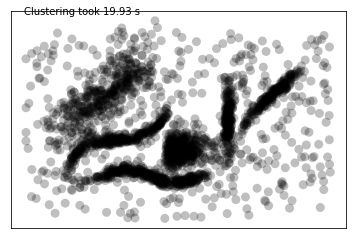

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation
Affinity_clustering = AffinityPropagation()

plot_clusters(data , Affinity_clustering)


MEAN SHIFT ALGORITHM FOR CLUSTERING

0.23392424409997176
[0 0 0 ... 2 2 0]
3
calinski harabasz score is  2012.0062970470692
silhouette_score 0.42684451904942083
davies bouldin score  0.8272181293134514
None


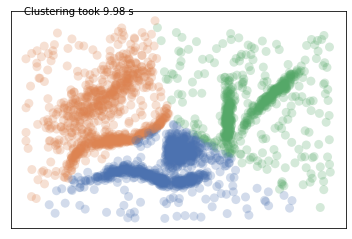

In [29]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(data, quantile=0.2, n_samples=500)
print(bandwidth)
MS =  MeanShift(bandwidth=bandwidth)
plot_clusters(data , MS)
#cluster_centers = MS.cluster_centers_

In [21]:
print(len(MS.cluster_centers_))

63


Agglomerative clustering

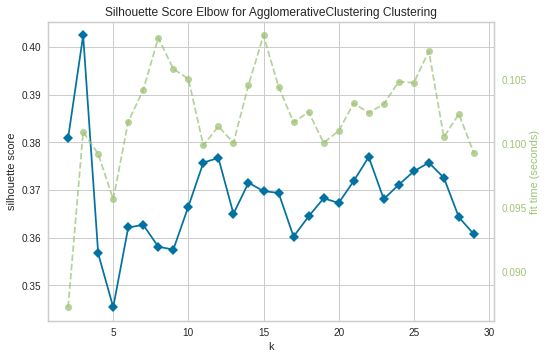

Optimal number of clusters based on silhouette score: [3]


In [30]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
AGC = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(AGC, k=(2,30),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(data_std)       # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

df = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df['scores'] = visualizer.k_scores_
df1 = df[df.scores == df.scores.max()]
print('Optimal number of clusters based on silhouette score:', df1['centers'].tolist())

[0 0 0 ... 0 2 0]
3
calinski harabasz score is  1490.9123989175553
silhouette_score 0.40244815791908284
davies bouldin score  0.7320556453263745
None


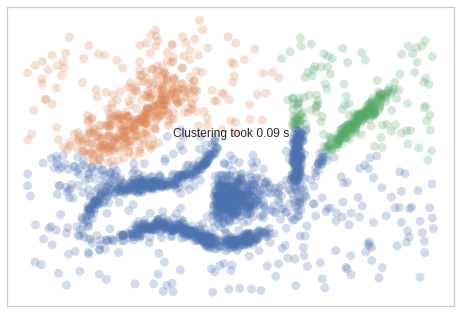

In [31]:
from sklearn.cluster import AgglomerativeClustering

AGC = AgglomerativeClustering(n_clusters = 3, affinity='euclidean')

plot_clusters(data_standardizer(data) , AGC)


DBSCAN CLUSTERING

In [32]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(data_standardizer(data))
distances, indices = neighbors.kneighbors(data_standardizer(data))
distances = np.sort(distances[:,10], axis=0)




In [33]:
i = np.arange(len(distances))


In [34]:
i

array([   0,    1,    2, ..., 2306, 2307, 2308])

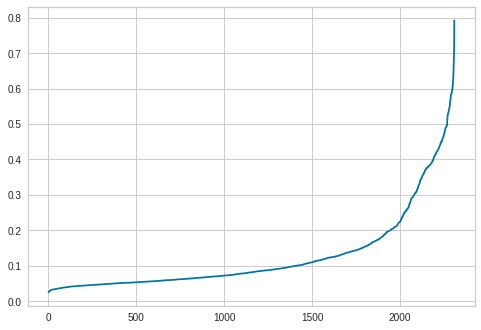

In [35]:
plt.plot(i , distances)


In [36]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps= 0.25)


[0 0 0 ... 1 0 0]
8
calinski harabasz score is  34.44243747539222
silhouette_score -0.08671175461761953
davies bouldin score  3.5075417242507783
None


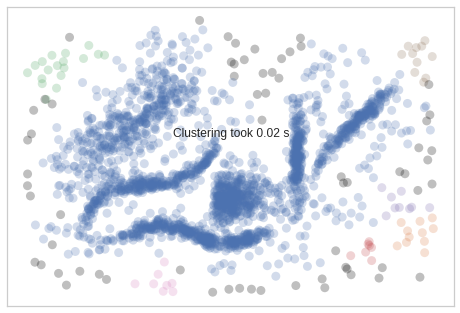

In [37]:
plot_clusters(data_standardizer(data) , dbscan)


In [40]:
pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 13.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl size=2340735 sha256=57b0352ca9a7f61e1e6082de3576d01fe8e681f74e6c46cd373cdff619cc35a3
  Stored in directory: /root/.cache/pip/wheels/93/78/2e/03ee191669a772e9653260aa3bd53e0b1a768751a9676e8c82
Successfully built hdbscan


[ 2  2  2 ... -1 -1  2]
4
calinski harabasz score is  487.0620798540668
silhouette_score 0.27276912531052094
davies bouldin score  2.4066730133348035
None


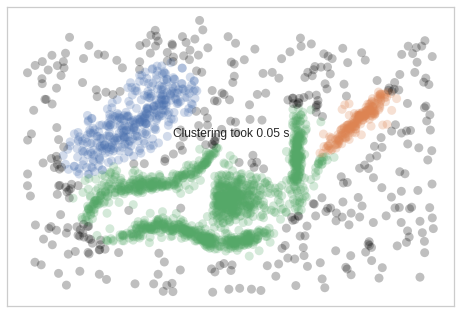

In [70]:
import hdbscan
hdb = hdbscan.HDBSCAN(metric='euclidean', min_cluster_size=35,cluster_selection_epsilon=0.25)
plot_clusters(data_standardizer(data) , hdb)

In [53]:
pip install clusteval


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=8673852b1b5f9092aa84fd6c5083591231ecf125029de4cc0a270e71df1a691d
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=66c0abb68ea538fb2d67c2854406a55c342f8121ca690bd4ba15383d52f713bb
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built sklearn wget


In [62]:
# # Import library
# from clusteval import clusteval

# # Set parameters, as an example dbscan
# ce = clusteval(cluster = 'hdbscan' ,linkage = 'single',evaluate='silhouette')


# # Fit to find optimal number of clusters using dbscan
# results= ce.fit(data)

# # Make plot of the cluster evaluation
# ce.plot()

# # Make scatter plot. Note that the first two coordinates are used for plotting.
# ce.scatter(data)

# # results is a dict with various output statistics. One of them are the labels.
# cluster_labels = results['labx']

SPECTRAL CLUSTERING

[1 1 1 ... 1 0 1]
3
calinski harabasz score is  1913.152762778777
silhouette_score 0.44828709902447583
davies bouldin score  0.7200390863140709
None


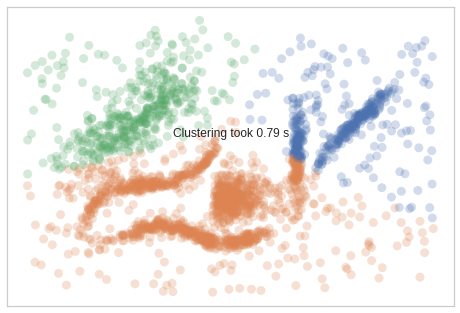

In [71]:
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
SC = SpectralClustering(n_clusters = 3,affinity='rbf', random_state=121) 
plot_clusters(data_std ,SC)
   

In [ ]:
from scipy.spatial.distance import pdist, squareform
def getAffinityMatrix(coordinates, k = 3):
    """
    Calculate affinity matrix based on input coordinates matrix and the numeber
    of nearest neighbours.
    
    Apply local scaling based on the k nearest neighbour
        References:
    https://papers.nips.cc/paper/2619-self-tuning-spectral-clustering.pdf
    """
    # calculate euclidian distance matrix
    dists = squareform(pdist(coordinates)) 
    
    # for each row, sort the distances ascendingly and take the index of the 
    #k-th position (nearest neighbour)
    knn_distances = np.sort(dists, axis=0)[k]
    knn_distances = knn_distances[np.newaxis].T
    
    # calculate sigma_i * sigma_j
    local_scale = knn_distances.dot(knn_distances.T)

    affinity_matrix = dists * dists
    affinity_matrix = -affinity_matrix / local_scale
    # divide square distance matrix by local scale
    affinity_matrix[np.where(np.isnan(affinity_matrix))] = 0.0
    # apply exponential
    affinity_matrix = np.exp(affinity_matrix)
    np.fill_diagonal(affinity_matrix, 0)
    return affinity_matrix

In [ ]:
affinity_matrix = getAffinityMatrix(data, k = 3)


In [ ]:
import scipy
from scipy.sparse import csgraph
# from scipy.sparse.linalg import eigsh
from numpy import linalg as LA
def eigenDecomposition(A, plot = True, topK = 3):
    """
    :param A: Affinity matrix
    :param plot: plots the sorted eigen values for visual inspection
    :return A tuple containing:
    - the optimal number of clusters by eigengap heuristic
    - all eigen values
    - all eigen vectors
    
    This method performs the eigen decomposition on a given affinity matrix,
    following the steps recommended in the paper:
    1. Construct the normalized affinity matrix: L = D−1/2ADˆ −1/2.
    2. Find the eigenvalues and their associated eigen vectors
    3. Identify the maximum gap which corresponds to the number of clusters
    by eigengap heuristic
    
    References:
    https://papers.nips.cc/paper/2619-self-tuning-spectral-clustering.pdf
    http://www.kyb.mpg.de/fileadmin/user_upload/files/publications/attachments/Luxburg07_tutorial_4488%5b0%5d.pdf
    """
    L = csgraph.laplacian(A, normed=True)
    n_components = A.shape[0]
    
    # LM parameter : Eigenvalues with largest magnitude (eigs, eigsh), that is, largest eigenvalues in 
    # the euclidean norm of complex numbers.
#     eigenvalues, eigenvectors = eigsh(L, k=n_components, which="LM", sigma=1.0, maxiter=5000)
    eigenvalues, eigenvectors = LA.eig(L)
    
    if plot:
        plt.title('Largest eigen values of input matrix')
        plt.scatter(np.arange(len(eigenvalues)), eigenvalues)
        plt.grid()
        
    # Identify the optimal number of clusters as the index corresponding
    # to the larger gap between eigen values
    index_largest_gap = np.argsort(np.diff(eigenvalues))[::-1][:topK]
    nb_clusters = index_largest_gap + 1
        
    return nb_clusters, eigenvalues, eigenvectors

Optimal number of clusters [393 415 583]


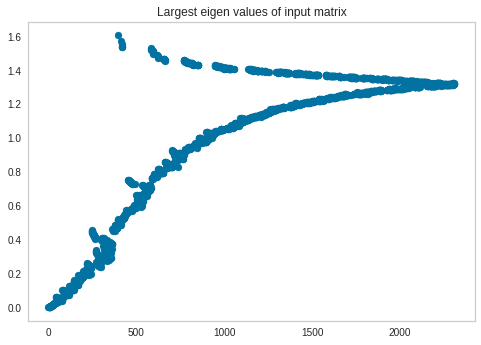

In [ ]:
k, _,  _ = eigenDecomposition(affinity_matrix)
print(f'Optimal number of clusters {k}')

In [ ]:
labels_kmeans = kmeans.fit_predict(data)
validation_score(data , labels_kmeans)

calinski harabasz score is  2164.5050050014806
silhouette_score 0.46319107032549806
davies bouldin score  0.750132742885747


In [ ]:
labels_kmeans = kmeans.fit_predict(data)
validation_score(data , labels_kmeans)